In [4]:
import numpy as np
from scipy import stats
import pandas as pd

In [6]:
df = pd.read_excel('результаты А_B.xlsx')

In [7]:
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
5,540,gate_40,187,1,1
6,1066,gate_30,0,0,0
7,1444,gate_40,2,0,0
8,1574,gate_40,108,1,1
9,1587,gate_40,153,1,0


In [8]:
df.shape

(90189, 5)

Проверим выборку на нормальность с помощью теста Колмагорова-Смирнова

H0: х взята из генеральной совокупности с нормальным распределением

H1: х взята из генеральной совокупности с дргуим распределением

Если p > alpha то можно заключить, что анализируемое распределение не отличается от нормального.

In [25]:
x = norm.rvs(size = 250) # 250 наблюдений, 5 степеней свободы
y = t.rvs(size = 250, df = 5)

In [26]:
from scipy.stats import norm, t, kstest, shapiro
print(kstest(x, 'norm'))
print(kstest(y, 'norm'))

KstestResult(statistic=0.047216075477374164, pvalue=0.6157178958711202, statistic_location=0.6532923100594705, statistic_sign=-1)
KstestResult(statistic=0.07027731518540226, pvalue=0.16134132478356444, statistic_location=1.6475484333524557, statistic_sign=-1)


Получаем pvalue > alpha, значит можно сделать вывод, что у нас нормальная выборка.

In [33]:
df.shape

(90189, 5)

In [34]:
df.retention_7.value_counts()

0    73408
1    16781
Name: retention_7, dtype: int64

In [35]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [70]:
# Посчитаем количество игроков в обоих группах:
df.groupby('version')['version'].count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

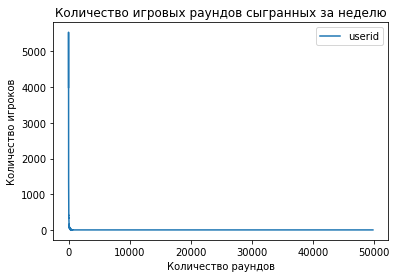

In [87]:
%matplotlib inline

# Посмотрим сколько раундов сыграл каждый игрок:
plot_df = df.groupby('sum_gamerounds').count().reset_index()

ax = plot_df.head(n=60000).plot('sum_gamerounds', 'userid')
ax.set_xlabel("Количество раундов")
ax.set_ylabel("Количество игроков")
ax.set_title("Количество игровых раундов сыгранных за неделю");

Из графика видно, что есть выброс, который сильно отличается от остальных наблюдений. Один игрок сыграл почти 50 000 раундов игры в течение первой недели.

In [78]:
df ['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

Получаем, что 50% игроков сыграли в среднем по 16 раундов, посмотрим как это будет выглядеть на графике

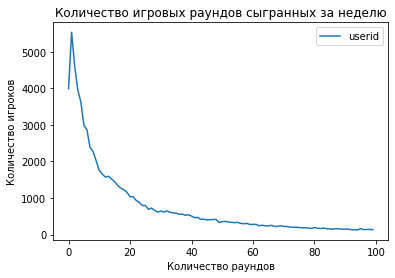

In [89]:
ax = plot_df.head(n=100).plot('sum_gamerounds', 'userid')
ax.set_xlabel("Количество раундов")
ax.set_ylabel("Количество игроков")
ax.set_title("Количество игровых раундов сыгранных за неделю");

In [80]:
# Проведем анализ для 7 дневного удержания:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Для группы gate_30 получаем среднее значение больше, чем для группы gate_40, но разница очень мала.

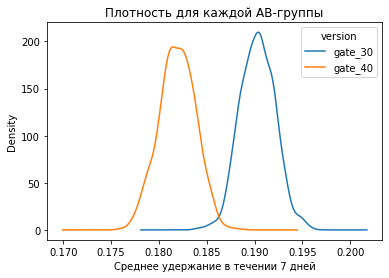

In [85]:
# Увеличим число итераций:
boot = []
iterat=700
for i in range(iterat):
    bootm = df.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()
    boot.append(bootm)

boot = pd.DataFrame(boot)
ax = boot.plot.kde()
ax.set_title('Плотность для каждой AB-группы')
ax.set_xlabel('Среднее удержание в течении 7 дней');

Вывод: для 7 дневного удержания больше подходит gate_30.